# Desafio Técnico Liven

**Lucas Sala Battisti**  
21/06/2025

* **Bibliotecas:**

In [88]:
import pandas as pd
import numpy as np

from pandasql import sqldf
# Atalho para query
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns
import matplotlib.pyplot as plt

---

# Atividade 1:

* **Importando as bases de dados:**

In [89]:
df_full = pd.read_csv('campeonato-brasileiro-full.csv')
df_estat = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')
df_cartoes = pd.read_csv('campeonato-brasileiro-cartoes.csv')
df_gols = pd.read_csv('campeonato-brasileiro-gols.csv')

Para garantir a consistência entre as bases de dados, irei manter apenas as partidas presentes em todas as bases.

In [90]:
# Query para obter os ids em comum das partidas
query = """
SELECT DISTINCT 
    full.ID AS partida_id_comuns
FROM 
    df_full AS full
INNER JOIN 
    df_estat AS estat
    ON full.ID = estat.partida_id
INNER JOIN 
    df_cartoes AS cartoes
    ON full.ID = cartoes.partida_id
INNER JOIN 
    df_gols AS gols
    ON full.ID = gols.partida_id
"""
ids_comuns_df = pysqldf(query)

# Convertido para lista para filtrar partidas com .isin()
ids_comuns = ids_comuns_df['partida_id_comuns'].tolist()

# Filtrando partidas compatíveis
df_full = df_full[df_full['ID'].isin(ids_comuns)]
df_estat = df_estat[df_estat['partida_id'].isin(ids_comuns)]
df_cartoes = df_cartoes[df_cartoes['partida_id'].isin(ids_comuns)]
df_gols = df_gols[df_gols['partida_id'].isin(ids_comuns)]

## Base de dados `full`: 

|       Coluna       |           Tipo          |
|:------------------:|:-----------------------:|
| ID                 | _int_                   |
| rodata             | _int_                   |
| data               | _datetime_ (dd/mm/aaaa) |
| hora               | _datetime_ (hh:mm)      |
| mandante           | _string_                |
| visitante          | _string_                |
| formacao_mandante  | _string_                |
| formacao_visitante | _string_                |
| vencedor           | _string_                |
| mandante_Placar    | _int_                   |
| visitante_Placar   | _int_                   |

As colunas `tecnico_mandante`, `tecnico_visitante`, `mandante_Estado`, `visitante_Estado` e `arena` foram removidas por serem irrelevantes.

* **Convertendo tipos de colunas no DataFrame `full`**:

In [91]:
# Removendo colunas
df_full = df_full.drop(columns=
                       ['tecnico_mandante', 'tecnico_visitante',
                        'mandante_Estado', 'visitante_Estado', 'arena'])

# Int
df_full['ID'] = df_full['ID'].astype(int)
df_full['rodata'] = df_full['rodata'].astype(int)
df_full['mandante_Placar'] = df_full['mandante_Placar'].astype(int)
df_full['visitante_Placar'] = df_full['visitante_Placar'].astype(int)

# Datetime
df_full['data'] = pd.to_datetime(df_full['data'], format='%d/%m/%Y')
df_full['hora'] = pd.to_datetime(df_full['hora'], format='%H:%M', errors='coerce').dt.time

# Strings
df_full['mandante'] = df_full['mandante'].astype('string')
df_full['visitante'] = df_full['visitante'].astype('string')
df_full['formacao_mandante'] = df_full['formacao_mandante'].astype('string')
df_full['formacao_visitante'] = df_full['formacao_visitante'].astype('string')
df_full['vencedor'] = df_full['vencedor'].astype('string')

* **Verificando proporção de NaN nas colunas:**

In [92]:
# Função que retorna dataframe com proporção de NaN por coluna
def NaN_prop(df: pd.DataFrame) -> pd.DataFrame:
    df_prop = df.isna().mean().to_frame('proporção de NaN')
    df_prop = df_prop[df_prop['proporção de NaN'] > 0]  # apenas colunas que tem NaN
    return df_prop

NaN_prop(df_full)

,proporção de NaN
formacao_mandante,0.087743
formacao_visitante,0.087743


In [93]:
# Tabela com as colunas que tem dados faltantes
print(df_full.sort_values('ID')[['formacao_mandante', 'formacao_visitante']])

     formacao_mandante formacao_visitante
4606              <NA>               <NA>
4607              <NA>               <NA>
4611              <NA>               <NA>
4610              <NA>               <NA>
4609              <NA>               <NA>
...                ...                ...
8783           4-2-3-1          4-1-2-1-2
8778             4-3-3            4-3-2-1
8780             4-3-3            4-3-2-1
8781           4-2-3-1            4-2-3-1
8784             4-4-2            4-3-1-2

[3761 rows x 2 columns]


Observa-se que os dados faltantes na variável de formação ocorrem porque, nos primeiros campeonatos, essa informação não era registrada. Dessa forma, não existe maneira de inputar esses dados. Além disso, a quantidade de valores ausentes é pequena, Inicialmente, opta-se por manter os dados faltantes.

## Base de dados `estat`: 

|      Coluna       |          Tipo           |
|:-----------------:|:-----------------------:|
| partida_id        | _int_                   |
| rodata            | _int_                   |
| clube             | _string_                |
| chutes            | _int_                   |
| chutes_no_alvo    | _int_                   |
| posse_de_bola     | _float_  |
| passes            | _int_                   |
| precisao_passes   | _float_   |
| faltas            | _int_                   |
| cartao_amarelo    | _int_                   |
| cartao_vermelho   | _int_                   |
| impedimentos      | _int_                   |
| escanteios        | _int_                   |



* **Convertendo tipos de colunas no DataFrame `estat`**:

In [94]:
# Int
df_estat['partida_id'] = df_estat['partida_id'].astype(int)
df_estat['rodata'] = df_estat['rodata'].astype(int)
df_estat['chutes'] = df_estat['chutes'].astype(int)
df_estat['chutes_no_alvo'] = df_estat['chutes_no_alvo'].astype(int)
df_estat['passes'] = df_estat['passes'].astype(int)
df_estat['faltas'] = df_estat['faltas'].astype(int)
df_estat['cartao_amarelo'] = df_estat['cartao_amarelo'].astype(int)
df_estat['cartao_vermelho'] = df_estat['cartao_vermelho'].astype(int)
df_estat['impedimentos'] = df_estat['impedimentos'].astype(int)
df_estat['escanteios'] = df_estat['escanteios'].astype(int)

# Strings
df_estat['clube'] = df_estat['clube'].astype('string')

# Convertendo percentuais para float
df_estat['posse_de_bola'] = df_estat['posse_de_bola'].str.replace('%', '', regex=False) # remove '%'
df_estat['posse_de_bola'] = df_estat['posse_de_bola'].astype(float)/100 # divide por 100

df_estat['precisao_passes'] = df_estat['precisao_passes'].str.replace('%', '', regex=False) # remove '%'
df_estat['precisao_passes'] = df_estat['precisao_passes'].astype(float)/100 # divide por 100

In [95]:
NaN_prop(df_estat)

,proporção de NaN
posse_de_bola,0.186652
precisao_passes,0.463441


Novamente a presença de dados faltantes é causado pela falta de registro dessas informações em parte das partidas. Isso torna difícil inputar esses dados. Além disso, é importante destacar que a quantidade de valores ausentes é muito grande. Inicialmente, opta-se por manter os dados faltantes.

## Base de dados `cartoes`: 

|     Coluna     |           Tipo           |
|:--------------:|:------------------------:|
| partida_id     | _int_                    |
| rodata         | _int_                    |
| clube          | _string_                 |
| cartao         | _string_                 |
| atleta         | _string_                 |

As colunas `num_camisa`, `posicao` e `minuto` foram removidas por serem irrelevantes.

* **Convertendo tipos de colunas no DataFrame `cartoes`**:

In [96]:
# Removendo colunas
df_cartoes = df_cartoes.drop(columns=
                             ['num_camisa', 'posicao', 'minuto'])

# Int
df_cartoes['partida_id'] = df_cartoes['partida_id'].astype(int)
df_cartoes['rodata'] = df_cartoes['rodata'].astype(int)

# Strings
df_cartoes['clube'] = df_cartoes['clube'].astype('string')
df_cartoes['cartao'] = df_cartoes['cartao'].astype('string')
df_cartoes['atleta'] = df_cartoes['atleta'].astype('string')

In [97]:
NaN_prop(df_cartoes)

,proporção de NaN
atleta,0.000312


In [98]:
print(df_cartoes[df_cartoes['atleta'].isna()])

       partida_id  rodata          clube    cartao atleta
8471         6303      20        Vitoria   Amarelo   <NA>
8966         6420      30        Vitoria   Amarelo   <NA>
12359        7124      24  Internacional   Amarelo   <NA>
13102        7291       3  Internacional  Vermelho   <NA>
13174        7309       5  Internacional   Amarelo   <NA>
13281        7332       7  Internacional   Amarelo   <NA>


Apenas seis registros apresentam o nome do atleta como dado faltante. Como essa informação não é tão essencial, e não faz sentido inputar ou excluir esses registros, opta-se por manter os dados faltantes.

## Base de dados `gols`: 

|     Coluna     |         Tipo         |
|:--------------:|:--------------------:|
| partida_id     | _int_                |
| rodata         | _int_                |
| clube          | _string_             |
| atleta         | _string_             |
| minuto         | _int_     |
| acrescimo | _int_ |
| tipo_de_gol    | _string_ |

A variável `acrescimo` foi criada para quando o gol foi feito durante o tempo de acréscimo de um dos tempos. Quando o gol não acontece no acréscimo, o valor atribuído é 0; caso contrário, o valor representa o minuto do acréscimo em que o gol foi marcado.

* **Convertendo tipos de colunas no DataFrame `gols`**:

In [99]:
# Preparando a coluna acrescimo
df_gols[['minuto', 'acrescimo']] = df_gols['minuto'].str.split('+', expand=True)
df_gols['acrescimo'] = df_gols['acrescimo'].fillna(0) # Substitui os None por 0 (não aconteceu no acréscimo)

# Inteiros
df_gols['partida_id'] = df_gols['partida_id'].astype(int)
df_gols['rodata'] = df_gols['rodata'].astype(int)
df_gols['minuto'] = df_gols['minuto'].astype(int)
df_gols['acrescimo'] = df_gols['acrescimo'].astype(int)

# Strings
df_gols['clube'] = df_gols['clube'].astype('string')
df_gols['atleta'] = df_gols['atleta'].astype('string')
df_gols['tipo_de_gol'] = df_gols['tipo_de_gol'].astype('string')

In [100]:
NaN_prop(df_gols)

,proporção de NaN
tipo_de_gol,0.879312


* **Coluna `tipo_de_gol`:**

In [101]:
print(df_gols['tipo_de_gol'])

0             <NA>
1       Gol Contra
2          Penalty
3             <NA>
4             <NA>
           ...    
9856          <NA>
9857          <NA>
9858          <NA>
9859       Penalty
9860          <NA>
Name: tipo_de_gol, Length: 9711, dtype: string


Os dados faltantes na variável `tipo_de_gol` ocorrem porque não há uma categoria explícita para gols a favor. Para padronizar a variável, os valores ausentes serão imputados com a categoria "Gol":

In [102]:
df_gols['tipo_de_gol'] = df_gols['tipo_de_gol'].fillna("Gol")

---

# Atividade 2:

In [103]:
# Criando 2 dataframes para estatísticas do mandante e visitante
# para não precisar renomear as colunas manualmente
df_estat_mandante, df_estat_visitante  = df_estat.copy(), df_estat.copy()
df_estat_mandante, df_estat_visitante = (
    df_estat_mandante.add_prefix('mandante_'),
    df_estat_visitante.add_prefix('visitante_')
)

query = """
SELECT *
FROM 
    df_full
LEFT JOIN 
    df_estat_mandante
    ON ID = mandante_partida_id AND mandante = mandante_clube
LEFT JOIN 
    df_estat_visitante
    ON ID = visitante_partida_id AND visitante = visitante_clube
"""

df_partidas = pysqldf(query)

# Mudando de sufixo para prefixo
df_partidas = df_partidas.rename(columns={
    'formacao_mandante': 'mandante_formacao',
    'formacao_visitante': 'visitante_formacao'
})

# Removendo colunas redundantes
df_partidas = df_partidas.drop(columns=[
    'mandante_partida_id',
    'mandante_rodata',
    'mandante_clube',
    'visitante_partida_id',
    'visitante_rodata',
    'visitante_clube'
])

* **Imprimindo colunas do _dataframe_ `partidas`:**

In [104]:
print(df_partidas.columns)

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'mandante_formacao', 'visitante_formacao', 'vencedor',
       'mandante_Placar', 'visitante_Placar', 'mandante_chutes',
       'mandante_chutes_no_alvo', 'mandante_posse_de_bola', 'mandante_passes',
       'mandante_precisao_passes', 'mandante_faltas',
       'mandante_cartao_amarelo', 'mandante_cartao_vermelho',
       'mandante_impedimentos', 'mandante_escanteios', 'visitante_chutes',
       'visitante_chutes_no_alvo', 'visitante_posse_de_bola',
       'visitante_passes', 'visitante_precisao_passes', 'visitante_faltas',
       'visitante_cartao_amarelo', 'visitante_cartao_vermelho',
       'visitante_impedimentos', 'visitante_escanteios'],
      dtype='object')


---

# Atividade 3:

Inicialmente, será realizada uma análise preliminar com o objetivo de investigar uma possível associação entre a posse de bola e o resultado da partida. Para isso, será utilizado um gráfico do tipo _boxplot_.

In [105]:
# Seleciona colunas necessárias
df_query = df_estat[['partida_id', 'posse_de_bola', 'clube']].dropna()

# Adiciona a informação de quem venceu cada partida
df_query = df_query.merge(
    df_full[['ID', 'vencedor']],
    left_on='partida_id',
    right_on='ID',
    how='left'
).drop(columns='ID')

# Muda para poorcentagem
df_query['posse_de_bola'] = df_query['posse_de_bola']*100

# Ids de vitoria
ids_vitoria = (df_query['clube'] == df_query['vencedor'])

# Cria uma nova coluna para guardar a vitória ou não vitória do time
df_query['resultado'] = 'não vitória'
df_query.loc[ids_vitoria, 'resultado'] = 'vitória'


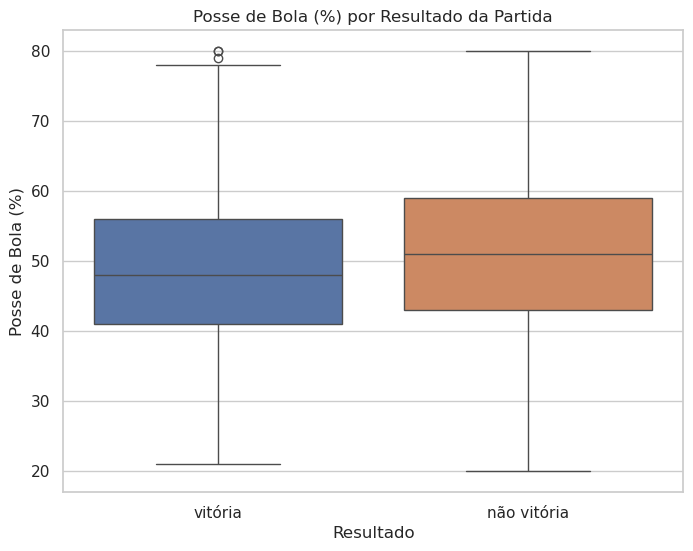

In [106]:
# Boxplot:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='resultado', y='posse_de_bola', data=df_query, hue='resultado')
plt.title('Posse de Bola (%) por Resultado da Partida')
plt.xlabel('Resultado')
plt.ylabel('Posse de Bola (%)')
plt.show()

Como podemos ver, o gráfico não mostra indício nenhum de associação entre a posse de bola e o resultado do jogo. Mas para entender melhor, precisamos olhar outras informações da partida. Por exemplo, se o time mandante (que joga em casa) costuma ter mais posse de bola, não considerar isso na análise pode causar um erro, porque o fato de ser mandante pode influenciar tanto a posse de bola quanto o resultado do jogo. Essa influência do mando de campo é chamada de confusão, e ela pode esconder a relação real entre posse de bola e resultado ([Pearl, 2009](#referencias)). Dessa forma, é necessário incluir essas outras características nas análises.

Um ponto importante a ser observado é a forma de organizar os dados. A proposta é que cada linha da base de dados represente o desempenho de um único time em uma partida específica, ou seja, para cada jogo haverá duas observações: uma para o time mandante e outra para o visitante. Essa organização permite incluir tanto as estatísticas do próprio time (como chutes a gol, posse de bola, cartões, etc.) quanto as estatísticas do adversário naquela mesma partida. Isso é importante porque o desempenho de um time muitas vezes depende diretamente do que o adversário fez ou deixou de fazer. No entanto, no caso da covariável posse de bola, será considerada apenas a posse de bola do próprio time, uma vez que os valores são complementares. Como a soma das posses de bola dos dois times é sempre 100%, incluir ambas as variáveis no modelo resultaria em multicolinearidade, o que impossibilita a estimação adequada dos coeficientes do modelo. 

* **Organizando os dados:**

In [107]:
# Criando um dataframe para estatísticas do adversário
# para não precisar renomear as colunas manualmente
df_estat_adversario  = df_estat.copy()
df_estat_adversario = df_estat_adversario.add_prefix('adversario_')

query = """
SELECT 
    e.*, 
    a.*, 
    CASE WHEN f.mandante = e.clube THEN 1 ELSE 0 END AS mandante,
    CASE WHEN f.vencedor = e.clube THEN 1 ELSE 0 END AS vitoria,
    formacao_mandante,
    formacao_visitante
FROM 
    df_estat AS e
LEFT JOIN 
    df_estat_adversario AS a
    ON e.partida_id = a.adversario_partida_id AND e.clube != a.adversario_clube
LEFT JOIN 
    df_full AS f
    ON e.partida_id = f.ID
"""

df_dados = pysqldf(query)

* **Alterando as colunas de formação do time mandante e time visitante para formação do próprio time e formação do time adversário:**

In [108]:
df_dados['formacao'] = df_dados.apply(
    lambda row: row['formacao_mandante'] if row['mandante'] == 1 else row['formacao_visitante'],
    axis=1
)

df_dados['adversario_formacao'] = df_dados.apply(
    lambda row: row['formacao_visitante'] if row['mandante'] == 1 else row['formacao_mandante'],
    axis=1
)

# Removendo colunas 
df_dados = df_dados.drop(columns=[
    # não servem como covariável:
    'partida_id',
    'rodata',
    'clube',
    'adversario_partida_id',
    'adversario_rodata',
    'adversario_clube',
    # retirado pela multicolinearidade:
    'adversario_posse_de_bola',
    # retirados pela redundancia:
    'formacao_mandante',
    'formacao_visitante'
])

* **Análisando se há dados faltantes:**

In [109]:
NaN_prop(df_dados)

,proporção de NaN
posse_de_bola,0.186652
precisao_passes,0.463441
adversario_precisao_passes,0.463441
formacao,0.087743
adversario_formacao,0.087743


As variáveis que apresentam dados faltantes não permitem uma imputação adequada. No caso da variável de precisão de passes, a proporção de valores ausentes é muito elevada, o que compromete sua utilização, por isso, ela será excluída da análise. Já a variável de formação tática apresenta dados faltantes em apenas quatro linhas (equivalente a duas partidas), e, por isso, optou-se por remover essas observações da base. Como a variável posse de bola é a variável de interesse será necessário remover as partidas em que ela não foi coletada.

A variável de formação tática é categórica e possui um número grande de categorias. Além disso, formações como '4-2-2-2' e '4-4-2', embora diferentes como texto, são muito semelhantes em estrutura. Por isso, optamos por transformá-la em três variáveis numéricas que representem a composição tática da equipe: número de defensores, de meio-campistas e de atacantes. O primeiro número da formação corresponde aos defensores, o último aos atacantes, e os valores intermediários aos jogadores de meio-campo ([Coelho, 2018](#referencias)).

* **Removendo os dados faltantes**:

In [110]:
# Remove a variável de precisão de passes
df_dados = df_dados.drop(columns=['precisao_passes', 'adversario_precisao_passes'])

# Remove as linhas onde a formação está faltando
df_dados = df_dados.dropna(subset=['formacao', 'adversario_formacao'])

* **Criando variáveis da formação tática**:

In [111]:
# Função que extrai defesa, meio-campo e ataque
def formacao_func(formacao: str) -> tuple:
    formacao_split = np.array(formacao.split('-'), dtype=np.int64)

    return(formacao_split[0], formacao_split[1:-1].sum(), formacao_split[-1]) # defesa, meio-campo e ataque


df_dados[['defensores',
          'meio_campo',
          'atacantes']] = df_dados['formacao'].apply(formacao_func).apply(pd.Series)

df_dados[['adversario_defensores',
          'adversario_meio_campo',
          'adversario_atacantes']] = df_dados['adversario_formacao'].apply(formacao_func).apply(pd.Series)

# Removendo as variáveis categóricas de formação tática
df_dados = df_dados.drop(columns=['formacao', 'adversario_formacao'])


Para investigar a influência da posse de bola sobre o resultado das partidas, será utilizada uma variável resposta binária que indica se o time venceu (1) ou não venceu (0) a partida. Serão ajustados dois modelos de classificação: o primeiro é um modelo logístico, que permite interpretar diretamente os coeficientes associados a cada covariável, facilitando a compreensão do efeito de cada uma delas sobre a probabilidade de vitória. O segundo modelo é a floresta aleatória, que possui uma estrutura mais flexível, capaz de capturar relações não lineares e interações entre as covariáveis. Além disso, esse modelo permite calcular a importância relativa das covariáveis, auxiliando na identificação dos fatores mais relevantes para o resultado da partida ([Izbicki, 2020](#referencias)).

* **Ajustando os modelos:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define a variável resposta
# Removendo os dados faltantes de posse de bola
y = df_dados.dropna(subset=['posse_de_bola'])['vitoria'] 

# Define os preditores (removendo a variável resposta)
# Removendo os dados faltantes de posse de bola
X = df_dados.dropna(subset=['posse_de_bola']).drop(columns=['vitoria'])

# Divide em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Treina os modelos
logistica = LogisticRegression(penalty=None, # Nenhuma penalização (Lasso/Ridge)
                               solver='saga', max_iter=10000) # Parâmetros para não haver não convergência

floresta = RandomForestClassifier(n_estimators=500) # 100 árvores

# Ajustando os modelos aos dados
logistica.fit(X_train, y_train)
floresta.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

* **Fazendo o gráfico de curva ROC:**

A curva ROC permite avaliar o desempenho dos modelos de classificação, mostrando a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos. Já a AUC (Área sob a Curva) resume essa performance em um único valor, variando de 0,5 (modelo aleatório) até 1 (classificação perfeita) ([Izbicki, 2020](#referencias)). Ambos os modelos apresentaram resultados razoáveis e AUCs que indicam capacidade de classificação satisfatória.

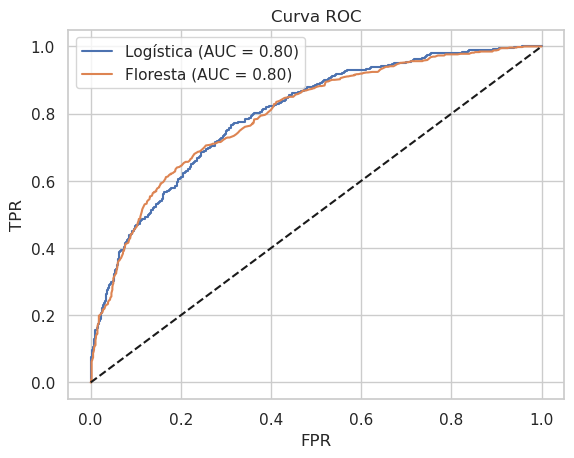

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculo das probabilidades estimadas
y_proba_logistica = logistica.predict_proba(X_test)[:, 1]
y_proba_floresta = floresta.predict_proba(X_test)[:, 1]

#Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logistica)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_floresta)

# AUCs
auc_log = roc_auc_score(y_test, y_proba_logistica)
auc_rf = roc_auc_score(y_test, y_proba_floresta)

# Gráfico
plt.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Floresta (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

* **Extraindo as 10 variáveis mais importantes para o modelo de Floresta Aleatória:**

A posse de bola do time foi a quinta variável de maior importância na predição da vitória segundo o modelo de Floresta Aleatória. Isso indica que a posse de bola contribui de forma relevante para explicar o resultado das partidas quando considerada junto a outras características do jogo.

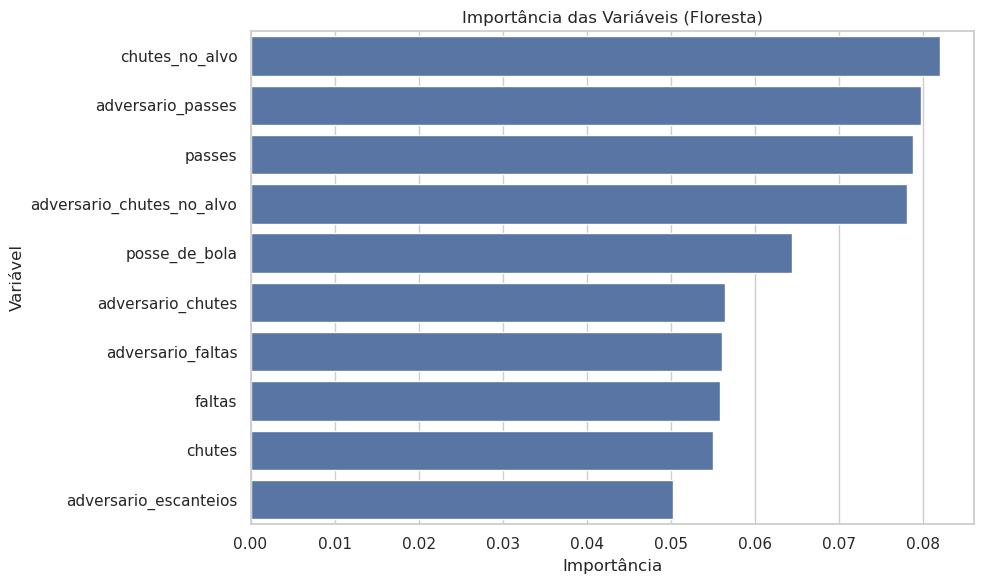

In [114]:
# Importâncias das variáveis
importances = floresta.feature_importances_
features = X.columns

# Cria DataFrame com as importâncias
importancia_df = pd.DataFrame({
    'variavel': features,
    'importancia': importances
}).sort_values(by='importancia', ascending=False)

# Visualiza as 10 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_df.head(10))
plt.title('Importância das Variáveis (Floresta)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

* **Analisando o coeficiente da variável posse de bola**:

Estamos calculando $e^{0.05 \cdot \beta_{\text{posse\_}\text{bola}}}$ que representa o fator multiplicativo na chance de vitória a cada aumento de 5 pontos percentuais na posse de bola. Um valor de aproximadamente 0,9974 indica que, nesse caso, um aumento de 5% na posse de bola está associado a uma pequena redução na chance de vitória, sugerindo que a posse de bola, por si só, não tem um efeito positivo relevante sobre o resultado da partida.

In [115]:
posse_de_bola_coef = logistica.coef_[0][X_train.columns == 'posse_de_bola'] # Coeficientes das variável posse de bola

print(np.exp(0.05*posse_de_bola_coef))

[0.99737284]


Para entender melhor o efeito da posse de bola na probabilidade de vencer a partida, será utilizada a técnica de ICE (Individual Conditional Expectation) para o modelo de floresta aleatória. O ICE permite visualizar como a predição do modelo muda conforme variamos o valor da posse de bola, mantendo as demais variáveis constantes para cada observação. Assim, conseguimos analisar o impacto individual da posse de bola sobre a chance de vitória, observando possíveis padrões ([Izbicki, 2020](#referencias)).

Pode-se observar que a maioria das curvas tem um decaimento à medida que a posse de bola aumenta. No entanto, esse decaimento não é tão acentuado, indicando que, isoladamente, a posse de bola não é um fator determinante para o resultado da partida, embora possa ter algum impacto quando considerada em conjunto com outras variáveis.

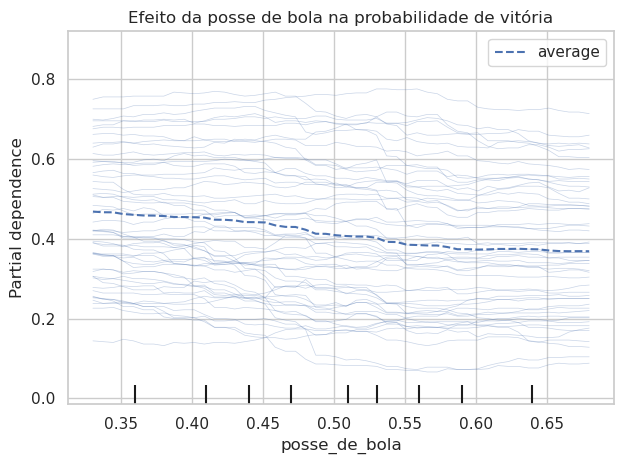

In [116]:
from sklearn.inspection import PartialDependenceDisplay

# Gráfico ICE
PartialDependenceDisplay.from_estimator(
    floresta,
    X_test,
    features=['posse_de_bola'],
    kind='both',
    subsample=50, # só irá mostrar 50 observações
    grid_resolution=50
)

plt.title('Efeito da posse de bola na probabilidade de vitória')
plt.tight_layout()
plt.show()

Agora, será realizada uma análise preliminar com o objetivo de investigar se é real a vantagem dos times mandantes.

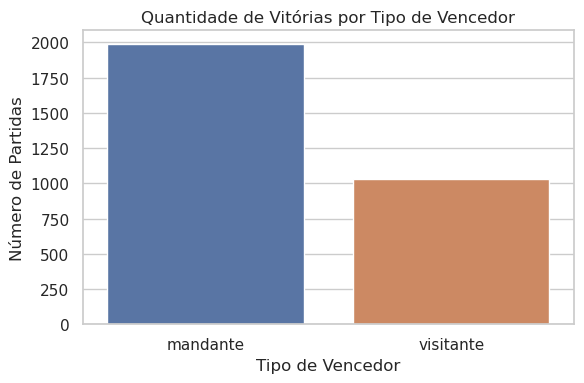

In [117]:
# Cria uma coluna que indica se o vencedor é mandante ou visitante
df_full['tipo_vencedor'] = df_full.apply(
    lambda row: 'mandante' if row['vencedor'] == row['mandante']
    else ('visitante' if row['vencedor'] == row['visitante'] else None),
    axis=1
)

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full[['tipo_vencedor']].dropna(), # Remove os empates
               x='tipo_vencedor', hue = 'tipo_vencedor')

plt.title('Quantidade de Vitórias por Tipo de Vencedor')
plt.xlabel('Tipo de Vencedor')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.show()

O gráfico mostra que o número de vitórias dos mandantes é quase o dobro do número de vitórias dos visitantes. Isso sugere uma possível vantagem real de jogar em casa, o que pode estar relacionado a fatores como apoio da torcida, familiaridade com o estádio e menor desgaste físico.
Dando continuidade à análise, repetiremos agora uma análise de forma similiar àquela que foi feita com a variável posse de bola. Para não perder uma parte significativa dos dados, optamos por substituir os valores faltantes da variável posse de bola por 50%, representando uma posse de bola neutra.

* **Substituindo dados faltantes**:

In [118]:
# Substituindo dados faltantes
df_dados['posse_de_bola'] = df_dados['posse_de_bola'].fillna(0.5)

* **Ajustando os modelos:**

In [119]:
# Define a variável resposta
y = df_dados['vitoria'] 

# Define os preditores (removendo a variável resposta)
X = df_dados.drop(columns=['vitoria'])

# Divide em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Treina os modelos
logistica = LogisticRegression(penalty=None, # Nenhuma penalização (Lasso/Ridge)
                               solver='saga', max_iter=10000) # Parâmetros para não haver não convergência

floresta = RandomForestClassifier(n_estimators=500) # 100 árvores

logistica.fit(X_train, y_train)
floresta.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

* **Fazendo o gráfico de curva ROC:**

Novamente ambos os modelos apresentaram resultados razoáveis e muito similares e AUCs que indicam capacidade de classificação satisfatória.

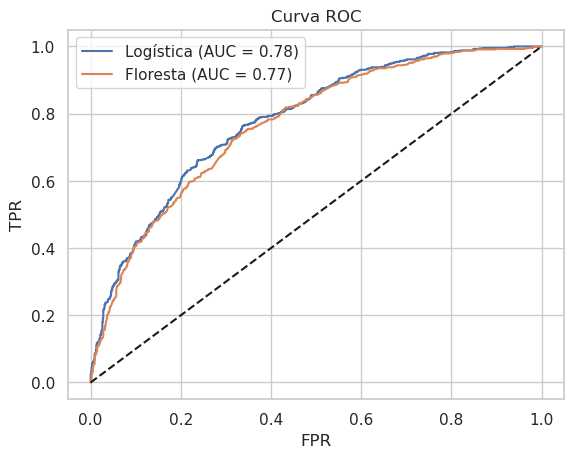

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba_logistica = logistica.predict_proba(X_test)[:, 1]
y_proba_floresta = floresta.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logistica)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_floresta)

auc_log = roc_auc_score(y_test, y_proba_logistica)
auc_rf = roc_auc_score(y_test, y_proba_floresta)

# Gráfico
plt.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Floresta (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

* **Extraindo as 10 variáveis mais importantes para o modelo de Floresta Aleatória:**

A caracteristica de ser mandante foi a oitava variável de maior importância na predição da vitória segundo o modelo de Floresta Aleatória. Isso indica que essa característica é razoavelmente relevante para explicar o resultado das partidas quando considerada junto a outras características do jogo.

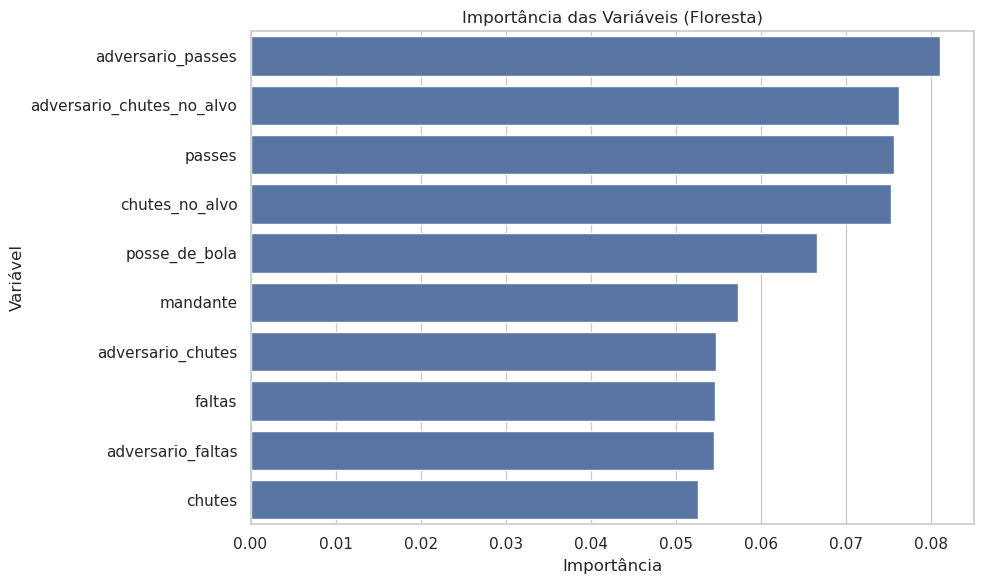

In [121]:
# Importâncias das variáveis
importances = floresta.feature_importances_
features = X.columns

# Cria DataFrame com as importâncias
importancia_df = pd.DataFrame({
    'variavel': features,
    'importancia': importances
}).sort_values(by='importancia', ascending=False)

# Visualiza as 10 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_df.head(10))
plt.title('Importância das Variáveis (Floresta)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

* **Analisando o coeficiente da variável posse de bola**:

Estamos calculando $e^{\beta_{\text{mandante}}}$ que representa o fator multiplicativo na chance de vitória quando o time é mandante. Um valor de aproximadamente 2,487 indica que ao jogar em casa, a chance de vitória do time é cerca de 2,49 vezes maior do que quando joga como visitante. Concluindo que o fato de o time ser mandante aumenta consideravelmente sua chance de vitória.

In [122]:
mandante_coef = logistica.coef_[0][X_train.columns == 'mandante'] # Coeficiente das variável mandante

print(np.exp(mandante_coef))

[2.48719708]


Por fim, será feita uma análise dos demais fatores com base na importância das variáveis estimada por um modelo de floresta aleatória, permitindo identificar quais contribuem mais para a previsão do resultado.

* **Extraindo a importância de todos os fatores:**

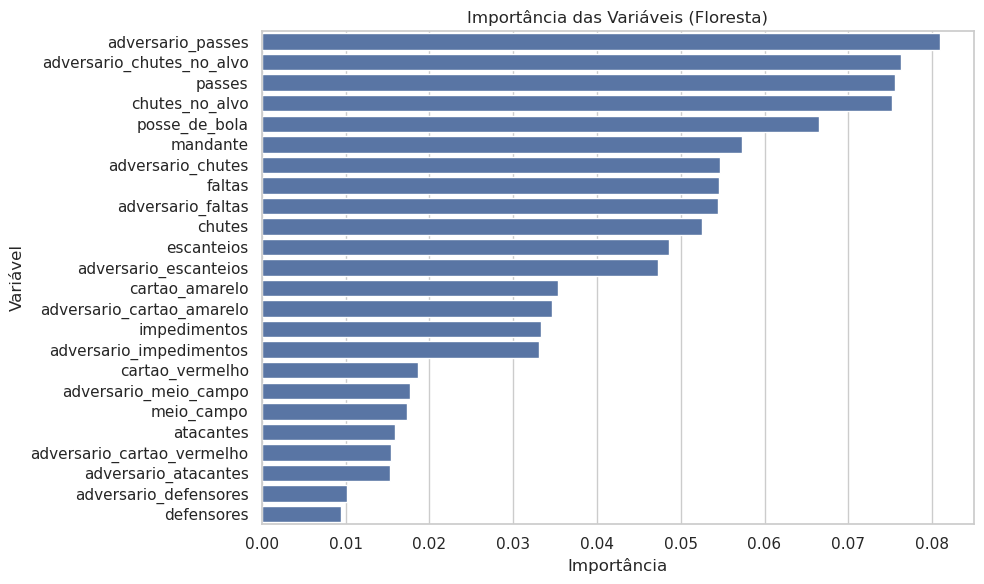

In [140]:
# Importâncias das variáveis
importances = floresta.feature_importances_
features = X.columns

# Cria DataFrame com as importâncias
importancia_df = pd.DataFrame({
    'variavel': features,
    'importancia': importances
}).sort_values(by='importancia', ascending=False)

# Visualiza TODAS as mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_df)
plt.title('Importância das Variáveis (Floresta)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

## Conclusão:

Essa análise indica que, embora a posse de bola tenha alguma relação com o resultado da partida, seu efeito isolado não é determinante para a vitória. Ter mais tempo com a bola nem sempre significa maior chance de vitória, especialmente quando não é acompanhado de ações ofensivas.

Por outro lado, jogar como mandante se mostrou um fator relevante, mais que dobrando a chance de vitória para o time da casa. Esse efeito pode estar associado à familiaridade com o campo e ao apoio da torcida.

No entanto, ao considerarmos todas as variáveis em conjunto, os fatores que mais se destacaram como preditores da vitória foram:

- **Número de passes**;
- **Chutes ao alvo**.

Essas estatísticas apresentaram maior importância relativa em modelos preditivos, indicando uma forte associação com o sucesso do time na partida.

Outras variáveis que também mostraram relevância, embora em menor grau, foram:

- **Número total de chutes**;
- **Número de faltas cometidas**.

Por outro lado, variáveis relacionadas à **formação tática**, **número de cartões** e **escanteios** tiveram impacto pequeno, sugerindo que esses aspectos têm menor influência direta no desfecho da partida.

---

## Referencias

- PEARL, Judea. **Causal inference in statistics: An overview**. 2009.
- COELHO, Paulo Vinícius. **Escola brasileira de futebol**. Objetiva, 2018.
- IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. **Aprendizado de máquina: uma abordagem estatística**. Rafael Izbicki, 2020.